In [1]:
#load the dataset
from google.colab import files

uploaded = files.upload()

Saving Heart_Disease_Dataset.csv to Heart_Disease_Dataset.csv


In [2]:
import pandas as pd
import io
from scipy import stats
import numpy as np

df = pd.read_csv(io.BytesIO(uploaded['Heart_Disease_Dataset.csv']))
print(df.shape)
df.head(100)

(1190, 12)


,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,58,1,4,130,263,0,0,140,1,2.0,2,1
96,43,1,2,142,207,0,0,138,0,0.0,1,0
97,39,1,3,160,147,1,0,160,0,0.0,1,0
98,56,1,4,120,85,0,0,140,0,0.0,1,0


section a:

i- dataset has 1190 rows and 12 columns, it means we have 1190 people and we have 12 feature about each of them.

In [3]:
print(df.isnull().sum())

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64


ii- we don't have any null feature for any of samples.

In [4]:
traget = df["target"]
print(traget.sum())

629


iii- we have 629 sample in class 1 and 561 samples in class 0. so they are almost balanced .

<ipython-input-5-7acf4d8c9a29>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(['','','','woman','','','','man'])
<ipython-input-5-7acf4d8c9a29>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(['','','','woman','','','','man'])


[Text(-0.75, 0, ''),
 Text(-0.5, 0, ''),
 Text(-0.25, 0, ''),
 Text(0.0, 0, 'woman'),
 Text(0.25, 0, ''),
 Text(0.5, 0, ''),
 Text(0.75, 0, ''),
 Text(1.0, 0, 'man'),
 Text(1.25, 0, ''),
 Text(1.5, 0, ''),
 Text(1.75, 0, '')]

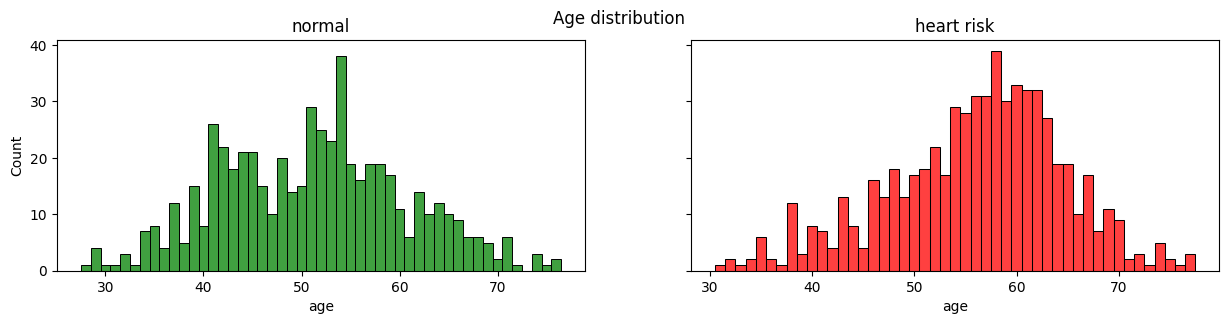

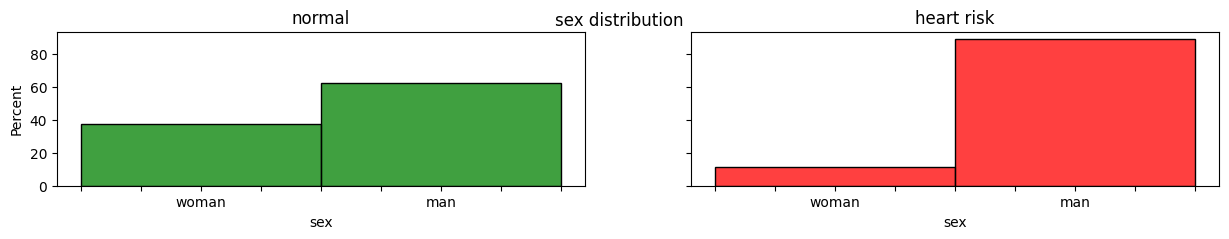

In [5]:
# section a part iv
import matplotlib.pyplot as plt
import seaborn as sns

class0 = df[df.target == 0]
class1 = df[df.target == 1]

fig, ax = plt.subplots(1, 2, figsize=(15, 3), sharey=True)
fig.suptitle('Age distribution')

sns.histplot(ax=ax[0],data=class0, x='age', color='green',discrete=True)
ax[0].set_title("normal")

sns.histplot(ax=ax[1], data=class1, x='age', color='red', discrete=True)
ax[1].set_title("heart risk")

fig, ax = plt.subplots(1, 2, figsize=(15, 2), sharey=True)
fig.suptitle('sex distribution')

sns.histplot(ax=ax[0],data=class0, x='sex', stat="percent", color='green',discrete=True)
ax[0].set_title("normal")
ax[0].set_xticklabels(['','','','woman','','','','man'])

sns.histplot(ax=ax[1], data=class1, x='sex', stat="percent", color='red', discrete=True)
ax[1].set_title("heart risk")
ax[1].set_xticklabels(['','','','woman','','','','man'])

In [63]:
# section b
numeric_data = df[["age", "resting bp s", "cholesterol", "max heart rate", "oldpeak"]]

z_threshold = 3
z_test = np.abs(stats.zscore(numeric_data)) > z_threshold
outliers_mask = z_test.any(axis=1)
data_clean = df[~outliers_mask]
outliers = df[outliers_mask]

row_indices, col_indices = np.where(z_test)
outlier_indices = list(zip(row_indices, z_test.columns[col_indices]))
print("outlier sample and outlier feature of that sample: \n ",outlier_indices)

original_size = df.shape[0]
final_size = data_clean.shape[0]
print("\n Number of outliers: ", outliers.shape[0])
print("Original size: ", original_size)
print("Final size after removing outliers: ",final_size)


outlier sample and outlier feature of that sample: 
  [(30, 'cholesterol'), (76, 'cholesterol'), (109, 'resting bp s'), (149, 'cholesterol'), (167, 'oldpeak'), (242, 'resting bp s'), (325, 'oldpeak'), (366, 'resting bp s'), (371, 'max heart rate'), (391, 'max heart rate'), (400, 'resting bp s'), (450, 'resting bp s'), (593, 'resting bp s'), (618, 'cholesterol'), (704, 'oldpeak'), (734, 'resting bp s'), (761, 'resting bp s'), (773, 'oldpeak'), (793, 'oldpeak'), (852, 'oldpeak'), (978, 'oldpeak'), (1010, 'oldpeak'), (1013, 'resting bp s'), (1039, 'cholesterol'), (1070, 'oldpeak'), (1075, 'resting bp s'), (1078, 'oldpeak'), (1172, 'oldpeak')]

 Number of outliers:  28
Original size:  1190
Final size after removing outliers:  1162


In [14]:
# section c
max_age = data_clean['age'].max()
max_resting_bp = data_clean['resting bp s'].max()
max_cholesterol = data_clean['cholesterol'].max()
max_heart_rate = data_clean['max heart rate'].max()
max_oldpeak = data_clean['oldpeak'].max()

normal_data = data_clean.copy()
normal_data['age'] = data_clean['age'] / max_age
normal_data['resting bp s'] = data_clean['resting bp s'] / max_resting_bp
normal_data['cholesterol'] = data_clean['cholesterol'] / max_cholesterol
normal_data['max heart rate'] = data_clean['max heart rate'] / max_heart_rate
normal_data['oldpeak'] = data_clean['oldpeak'] / max_oldpeak

normal_data.head()


,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,0.519481,1,2,0.756757,0.588595,0,0,0.851485,0,0.000,1,0
1,0.636364,0,3,0.864865,0.366599,0,0,0.772277,0,0.250,2,1
2,0.480519,1,2,0.702703,0.576375,0,1,0.485149,0,0.000,1,0
3,0.623377,0,4,0.745946,0.435845,0,0,0.534653,1,0.375,2,1
4,0.701299,1,3,0.810811,0.397149,0,0,0.603960,0,0.000,1,0


In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score

# Split data
X = normal_data.drop(columns=['target'])
y = normal_data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# SVM with Linear Kernel
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)

f1_linear = f1_score(y_test, y_pred_linear)
recall_linear = recall_score(y_test, y_pred_linear)
precision_linear = precision_score(y_test, y_pred_linear)
accuracy_linear = accuracy_score(y_test, y_pred_linear)

print("Results for Linear Kernel: \n")
print("F1 Score: ",f1_linear)
print("Recall: ",recall_linear)
print("Precision: ",precision_linear)
print("Accuracy: ",accuracy_linear)
print()

# SVM with RBF Kernel

svm_rbf = SVC(kernel='rbf', gamma=1)
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)

accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
f1_rbf = f1_score(y_test, y_pred_rbf)
recall_rbf = recall_score(y_test, y_pred_rbf)
precision_rbf = precision_score(y_test, y_pred_rbf)

print("Results for RBF Kernel: \n")
print("F1 Score: ",f1_rbf)
print("Recall: ",recall_rbf)
print("Precision: ",precision_rbf)
print("Accuracy: ",accuracy_rbf)
print()

# SVM with Polynomial Kernel

svm_poly = SVC(kernel='poly', degree=10)
svm_poly.fit(X_train, y_train)
y_pred_poly = svm_poly.predict(X_test)

accuracy_poly = accuracy_score(y_test, y_pred_poly)
f1_poly = f1_score(y_test, y_pred_poly)
recall_poly = recall_score(y_test, y_pred_poly)
precision_poly = precision_score(y_test, y_pred_poly)


print("Results for Polynomial Kernel: \n")
print("F1 Score: ",f1_poly)
print("Recall: ",recall_poly)
print("Precision: ",precision_poly)
print("Accuracy: ",accuracy_poly)
print()





Results for Linear Kernel: 

F1 Score:  0.8503937007874015
Recall:  0.8950276243093923
Precision:  0.81
Accuracy:  0.836676217765043

Results for RBF Kernel: 

F1 Score:  0.8659793814432991
Recall:  0.9281767955801105
Precision:  0.8115942028985508
Accuracy:  0.8510028653295129

Results for Polynomial Kernel: 

F1 Score:  0.8579387186629528
Recall:  0.850828729281768
Precision:  0.8651685393258427
Accuracy:  0.8538681948424068

